<a href="https://colab.research.google.com/github/Aliasss/vision/blob/master/pretrained_data_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google 드라이브를 마운트하려면 이 셀을 실행하세요.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dir = './drive/My Drive/test_colab/dog_cat_small/train'
validation_dir = './drive/My Drive/test_colab/dog_cat_small/validation'
test_dir = './drive/My Drive/test_colab/dog_cat_small/test'

# Using ImageNet_VGG16 model

In [0]:
from keras.applications import VGG16

In [0]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [66]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

마지막 층 block5_pool 위에 완전 연결층을 놓을 것

## 데이터 증식을 사용한 특성 추출

In [0]:
from keras import models, layers

In [68]:
# 완전 연결망 추가
model = models.Sequential()
model.add(vgg)
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               2048250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 16,763,189
Trainable params: 16,763,189
Non-trainable params: 0
_________________________________________________________________


**동결**

In [69]:
vgg.trainable = False
print('동결 후 훈련되는 가중치 수 :', len(model.trainable_weights))

동결 후 훈련되는 가중치 수 : 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [71]:
train_augmentation = ImageDataGenerator(rescale=1./255, rotation_range=40, height_shift_range=0.2, width_shift_range=0.2, zoom_range=0.2, shear_range=0.2, 
                               horizontal_flip=True, fill_mode='nearest')

test_augmentation = ImageDataGenerator(rescale=1./255)

train_generator = train_augmentation.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_augmentation.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [72]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, verbose=1)

Epoch 1/30
100/100 [==============================] - 22s 223ms/step - loss: 0.6090 - acc: 0.6645 - val_loss: 0.4628 - val_acc: 0.8160
Epoch 2/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4949 - acc: 0.7805 - val_loss: 0.3757 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4427 - acc: 0.8080 - val_loss: 0.3437 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 20s 201ms/step - loss: 0.4214 - acc: 0.8120 - val_loss: 0.3277 - val_acc: 0.8560
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3894 - acc: 0.8290 - val_loss: 0.3027 - val_acc: 0.8720
Epoch 6/30
100/100 [==============================] - 20s 199ms/step - loss: 0.3775 - acc: 0.8295 - val_loss: 0.2876 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 20s 200ms/step - loss: 0.3626 - acc: 0.8370 - val_loss: 0.2886 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 2

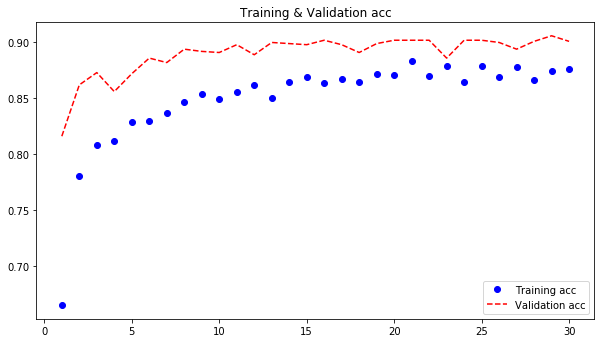

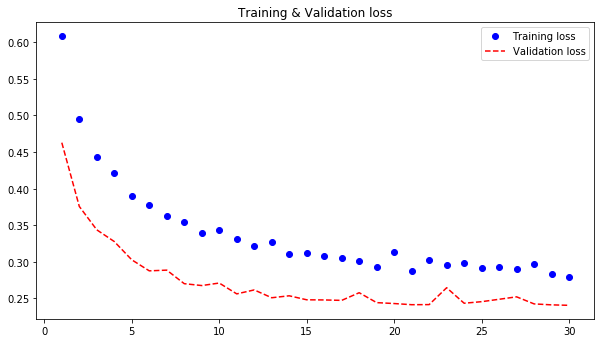

In [76]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.figure(figsize=(10,12))
plt.subplot(211)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r--', label='Validation acc')
plt.title('Training & Validation acc')
plt.legend(loc='best')

plt.figure(figsize=(10,12))
plt.subplot(212)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training & Validation loss')
plt.legend(loc='best')